In [16]:
import numpy as np

from scipy import optimize as opt
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
s = s[s>=0.]

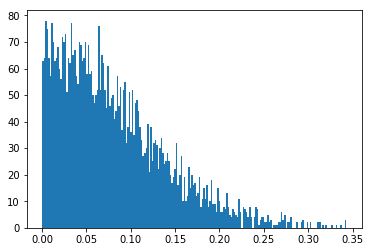

In [28]:
plt.hist(s, bins = 200)
plt.show()

In [34]:
def f(x, a, b):
    return - a * x ** 2 + b

In [30]:
a, b = 3, 5

n = 200
x = np.linspace(1, 20, n)
yexact = testfunc(x,a,b)


In [43]:
sigma = np.ones(n)*50
noise = np.random.randn(n) * sigma
y = yexact + noise

Unweighted fit parameters: [ 3.00593255  2.81448593]
Covariance matrix:
[[  9.95750120e-04   1.40037985e-01]
 [  1.40037985e-01   3.37729256e+01]]
rms error in fit: 43.8567250887

Weighted fit parameters: [ 3.00593257  2.81448999]
Covariance matrix:
[[  8.84100046e-04   1.24335998e-01]
 [  1.24335998e-01   2.99860803e+01]]
rms error in fit: 43.8567094208


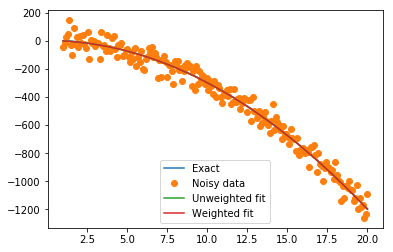

In [44]:

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

# Unweighted fit
p0 = 4, 2
popt, pcov = opt.curve_fit(f, x, y, p0)
yfit = f(x, *popt)
print('Unweighted fit parameters:', popt)
print('Covariance matrix:'); print(pcov)
print('rms error in fit:', rms(yexact, yfit))
print()

# Weighted fit
popt2, pcov2 = opt.curve_fit(f, x, y, p0, sigma=sigma, absolute_sigma=True)
yfit2 = f(x, *popt2)
print('Weighted fit parameters:', popt2)
print('Covariance matrix:'); print(pcov2)
print('rms error in fit:', rms(yexact, yfit2))

plt.plot(x, yexact, label='Exact')
plt.plot(x, y, 'o', label='Noisy data')
plt.plot(x, yfit, label='Unweighted fit')
plt.plot(x, yfit2, label='Weighted fit')
plt.legend(loc='lower center')
plt.show()

In [57]:
import numpy as np
from scipy.optimize import curve_fit
import pylab

x0, A, gamma = 12, 3, 5

n = 200
x = np.linspace(1, 20, n)
yexact = A * gamma**2 / (gamma**2 + (x-x0)**2)

# Add some noise with a sigma of 0.5 apart from a particularly noisy region
# near x0 where sigma is 3
sigma = np.ones(n)*0.5
sigma[np.abs(x-x0+1)<1] = 1
noise = np.random.randn(n) * sigma
y = yexact + noise

Unweighted fit parameters: [ 11.8461405    3.19866295   4.7526405 ]
Covariance matrix:
[[ 0.02429044 -0.00034315  0.00183243]
 [-0.00034315  0.01127812 -0.01929513]
 [ 0.00183243 -0.01929513  0.06459268]]
rms error in fit: 1.40943827373

Weighted fit parameters: [ 12.06863068   2.92914624   5.240031  ]
Covariance matrix:
[[ 0.02157936 -0.00236492  0.00617686]
 [-0.00236492  0.00916716 -0.01911112]
 [ 0.00617686 -0.01911112  0.06738615]]
rms error in fit: 0.575864885162


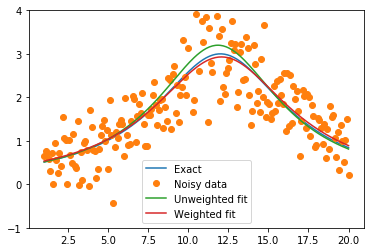

In [58]:
def f(x, x0, A, gamma):
    """ The Lorentzian entered at x0 with amplitude A and HWHM gamma. """
    return A *gamma**2 / (gamma**2 + (x-x0)**2)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

# Unweighted fit
p0 = 10, 4, 2
popt, pcov = curve_fit(f, x, y, p0)
yfit = f(x, *popt)
print('Unweighted fit parameters:', popt)
print('Covariance matrix:'); print(pcov)
print('rms error in fit:', rms(yexact, yfit))
print()

# Weighted fit
popt2, pcov2 = curve_fit(f, x, y, p0, sigma=sigma, absolute_sigma=True)
yfit2 = f(x, *popt2)
print('Weighted fit parameters:', popt2)
print('Covariance matrix:'); print(pcov2)
print('rms error in fit:', rms(yexact, yfit2))

pylab.plot(x, yexact, label='Exact')
pylab.plot(x, y, 'o', label='Noisy data')
pylab.plot(x, yfit, label='Unweighted fit')
pylab.plot(x, yfit2, label='Weighted fit')
pylab.ylim(-1,4)
pylab.legend(loc='lower center')
pylab.show()